# 5.5 Umgang mit Daten in `Pandas`: Aufgaben - Lösungen

## Aufgabe 1

### a) 
Lese die Datei `mtcars2` ein und speichere sie als `csv`-Datei. Gebe den oberen und unteren Bereich der Tabelle aus, um zu überprüfen, ob die `csv-Datei` korrekt eingelesen wurde.

In [49]:
import pandas as pd
import os
path = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))+r"\Repositories\Python_Tutorial\data\mtcars2.csv"
df = pd.read_csv(path, delimiter = ";")
print(df.head())
print(df.tail())

               Model  Year  Sales
0          Mazda RX4  1973  11705
1      Mazda RX4 Wag  1973  19334
2         Datsun 710  1973  19138
3     Hornet 4 Drive  1973  19349
4  Hornet Sportabout  1973  22911
             Model  Year  Sales
59    Lotus Europa  1974  22676
60  Ford Pantera L  1974  22921
61    Ferrari Dino  1974  10625
62   Maserati Bora  1974  14738
63      Volvo 142E  1974  10205


### b)
Beantworte folgende Fragen:
1. Wie heißt das Modell des 31. Autos in der Tabelle?
2. Wie oft wurde das 30. Auto verkauft?
3. In welchem Jahr wurde das 34. Auto das erste Mal verkauft.

(Tipp: Es reicht nicht, einfach das gesamte `Pandas.Dataframe` auszugeben, um die Werte abzulesen. Der gesuchte Bereich wird nämlich nicht angezeigt. Achte außerdem auf die richtige Indexwahl.)

#### 1. Möglichkeit: Slicing

In [40]:
df_ausschnitt = df.iloc[28:40]
print(df_ausschnitt)

                Model  Year  Sales
28     Ford Pantera L  1973  22447
29       Ferrari Dino  1973  10685
30      Maserati Bora  1973  16828
31         Volvo 142E  1973  13969
32          Mazda RX4  1974  14560
33      Mazda RX4 Wag  1974  17593
34         Datsun 710  1974  12710
35     Hornet 4 Drive  1974  21369
36  Hornet Sportabout  1974  13011
37            Valiant  1974  13872
38         Duster 360  1974  24845
39          Merc 240D  1974  22079


Antwort: 1. Mazda RX4, 2. 10685, 3. 1974

#### 2. Möglichkeit: Zugriff auf einzelne Stellen:

In [41]:
zeile = df.iloc[32][0]
print(zeile)
zeile = df.iloc[29][2]
print(zeile)
zeile = df.iloc[33][1]
print(zeile)

Mazda RX4
10685
1974


### c)
1. Gebe ein `Dataframe` aus, das die beiden Spalten `Model` und `Sales` enthält.
2. Gebe einen `Series` aus, der als Index die `Autonamen` und als Werte die `Sales` besitzt.

In [42]:
#1.
df2 = df[["Model","Sales"]]
print(df2)

                Model  Sales
0           Mazda RX4  11705
1       Mazda RX4 Wag  19334
2          Datsun 710  19138
3      Hornet 4 Drive  19349
4   Hornet Sportabout  22911
..                ...    ...
59       Lotus Europa  22676
60     Ford Pantera L  22921
61       Ferrari Dino  10625
62      Maserati Bora  14738
63         Volvo 142E  10205

[64 rows x 2 columns]


In [43]:
#2.
autos = df.iloc[:,0].values.tolist()
series = pd.Series(df.iloc[:,2].values.tolist(),index = autos)
print(series)

Mazda RX4            11705
Mazda RX4 Wag        19334
Datsun 710           19138
Hornet 4 Drive       19349
Hornet Sportabout    22911
                     ...  
Lotus Europa         22676
Ford Pantera L       22921
Ferrari Dino         10625
Maserati Bora        14738
Volvo 142E           10205
Length: 64, dtype: int64


### d) 
Bearbeite die Daten:
1. Füge in das oben stehende `Dataframe` eine zusätzliche Spalte `Verfügbarkeit` ein, in der jeder Eintrag lautet: `noch vorrätig`
2. Das Auto `Porsche 914-2` ist ausverkauft. Hinterlege das in deinem `Dataframe`.

In [44]:
#1.
df["Verfügbarkeit"] = "noch vorrätig"
print(df)

                Model  Year  Sales  Verfügbarkeit
0           Mazda RX4  1973  11705  noch vorrätig
1       Mazda RX4 Wag  1973  19334  noch vorrätig
2          Datsun 710  1973  19138  noch vorrätig
3      Hornet 4 Drive  1973  19349  noch vorrätig
4   Hornet Sportabout  1973  22911  noch vorrätig
..                ...   ...    ...            ...
59       Lotus Europa  1974  22676  noch vorrätig
60     Ford Pantera L  1974  22921  noch vorrätig
61       Ferrari Dino  1974  10625  noch vorrätig
62      Maserati Bora  1974  14738  noch vorrätig
63         Volvo 142E  1974  10205  noch vorrätig

[64 rows x 4 columns]


In [45]:
#2.
df.loc[df["Model"]=="Porsche 914-2"]

,Model,Year,Sales,Verfügbarkeit
26,Porsche 914-2,1973,17872,noch vorrätig
58,Porsche 914-2,1974,12609,noch vorrätig


In [46]:
df.loc[df["Model"]=="Porsche 914-2","Verfügbarkeit"] = "ausverkauft"

In [47]:
df.loc[df["Model"]=="Porsche 914-2"]

,Model,Year,Sales,Verfügbarkeit
26,Porsche 914-2,1973,17872,ausverkauft
58,Porsche 914-2,1974,12609,ausverkauft


### e) 
Visualisiere das `Dataframe`:<br>
Gebe eine Grafik aus, die zu den ersten fünf Modellen die Verkaufszahl anzeigt. Beschrifte außerdem die Achsen.

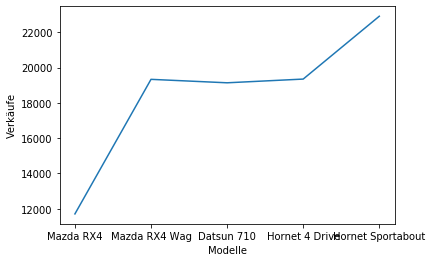

In [48]:
#1.
import matplotlib.pyplot as plt
import numpy as np
x = np.array(df.Model[:5])
y = np.array(df.Sales[:5])
plt.plot(x,y)
plt.xlabel('Modelle')
plt.ylabel('Verkäufe')
plt.show()